<a href="https://colab.research.google.com/github/tobyzawthuhtet/Deep-Learning-for-Yield-Prediction/blob/main/DeepNeural_Network_for_Crop_prediction_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
df1 = pd.read_csv('/content/drive/MyDrive/Tensorflow model for Agricultural use/tf_data.csv')
#df = pd.read_csv('/content/drive/MyDrive/Tensorflow model for Agricultural use/rastervalue_ANN.csv')
df1.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Assam,BAKSA,2011,Autumn,Paddy,10325,14340
1,Assam,BAKSA,2011,Summer,Paddy,2500,5595
2,Assam,BAKSA,2011,Winter,Paddy,85450,153149
3,Assam,BAKSA,2012,Autumn,Paddy,11780,16636
4,Assam,BAKSA,2012,Winter,Paddy,85485,157009


In [6]:
Area = df1[['Area']].values
Production= df1[['Production']].values
dataframe= df1[['Area','Production']]

In [234]:

def inputdataset (backscatter , ndvi, area):
  """
  This function create dataframe for inputting into model
  Input backscatter value in Bs
  Input Ndvi value for nd
  Input area value for area
  """
 # bs = float(input("enter any backscatter value"))
 #nd = float(input("enter any ndvi value"))
  #area = float(input("enter any area value"))
  ds = list()
  ds.append(backscatter)
  ds.append(ndvi)
  ds.append(area)
  ds= np.array(ds)
  ds=ds.reshape(1,3)
  return ds


In [175]:
model = Sequential( [
                     Dense(64,input_shape=(1,),activation='linear'),
                     Dense(128,activation='linear'),
                     Dense(64, activation='linear'),
                     Dense(8, activation='linear'),
                     Dense(1,activation='linear')
]
)
model.summary()
opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(opt, loss= 'mae',metrics=['mse','mae'])

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_140 (Dense)            (None, 64)                128       
_________________________________________________________________
dense_141 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_142 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_143 (Dense)            (None, 8)                 520       
_________________________________________________________________
dense_144 (Dense)            (None, 1)                 9         
Total params: 17,233
Trainable params: 17,233
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(Area,Production , epochs=300, batch_size=10, verbose=1, validation_split=0.1)
df1.plot(kind='scatter',
       x='Area',
       y='Production', title='Crop Predicton')


y_pred = model.predict(Area) #The predicted production based on area
#Plot the linear regression line
plt.plot(Area, y_pred, color='red')

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


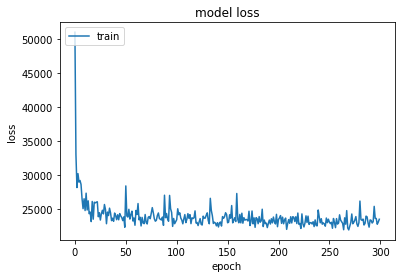

In [178]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [181]:
print( "Production {} units:" .format(model.predict([float(input('enter your area '))])))

enter your area 85450
Production [[132853.5]] units:


In [76]:
df1.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Assam,BAKSA,2011,Autumn,Paddy,10325,14340
1,Assam,BAKSA,2011,Summer,Paddy,2500,5595
2,Assam,BAKSA,2011,Winter,Paddy,85450,153149
3,Assam,BAKSA,2012,Autumn,Paddy,11780,16636
4,Assam,BAKSA,2012,Winter,Paddy,85485,157009


In [185]:
df.head()
X= df.drop(columns=['Yield_kg_'])
Y = df[['Yield_kg_']]
print(X)
#print(Y)

    Back Scatter      NDVI          Area
0       -8.85088  0.559350   5993.486648
1      -13.24120  0.313923   6234.321452
2       -7.58420  0.797050   6029.639943
3       -9.17053  0.785093   1757.187183
4       -9.13041  0.787306   2983.031785
5       -9.24853  0.772313   2103.118518
6      -11.08860  0.235669   2351.311600
7       -9.59054  0.243405   4014.493538
8      -12.05020  0.211970   3538.240272
9      -12.58330  0.350050  13877.701180
10      -9.96009  0.328686   4226.956361
11      -7.42669  0.871163  10152.390030
12     -10.33880  0.629234   3352.298047
13     -12.18080  0.815965   5660.277616
14     -11.69650  0.447593   4143.613795
15     -11.13040  0.561666   2409.372118
16     -10.65790  0.787920   4149.366995
17      -8.84726  0.784582   5075.319700
18     -10.44030  0.777570   3908.040939
19     -12.20420  0.769050   5162.396262
20     -10.32200  0.804077   4823.884587
21      -9.29397  0.884424   5754.692118
22      -8.26675  0.796062   3880.965285
23      -9.43378

In [213]:
model1 = Sequential( [
                     Dense(64,activation='linear',input_shape=(3,)),
                     Dense(128,activation='linear'),
                     Dense(64, activation='linear'),
                    Dense(1,activation='linear')
]
)
opt = tf.keras.optimizers.Adam(learning_rate=0.0009)
model1.compile(opt, loss= 'mae', metrics=['mse','mae'])

In [214]:
history1 =model1.fit(X,Y,epochs=300,validation_split= 0.1)


Epoch 1/300
2/2 [==============================] - 1s 168ms/step - loss: 570.2948 - mse: 390899.5208 - mae: 570.2948 - val_loss: 1104.1714 - val_mse: 1362017.6250 - val_mae: 1104.1714
Epoch 2/300
2/2 [==============================] - 0s 39ms/step - loss: 860.5237 - mse: 943408.8333 - mae: 860.5237 - val_loss: 312.6180 - val_mse: 106887.4766 - val_mae: 312.6180
Epoch 3/300
2/2 [==============================] - 0s 35ms/step - loss: 310.2794 - mse: 115094.7708 - mae: 310.2794 - val_loss: 456.1786 - val_mse: 228668.6250 - val_mae: 456.1786
Epoch 4/300
2/2 [==============================] - 0s 34ms/step - loss: 334.2323 - mse: 148726.0104 - mae: 334.2323 - val_loss: 461.9998 - val_mse: 240271.8281 - val_mae: 461.9998
Epoch 5/300
2/2 [==============================] - 0s 36ms/step - loss: 445.5088 - mse: 254856.3229 - mae: 445.5088 - val_loss: 628.6286 - val_mse: 443296.6250 - val_mae: 628.6286
Epoch 6/300
2/2 [==============================] - 0s 34ms/step - loss: 523.3891 - mse: 362227.5

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


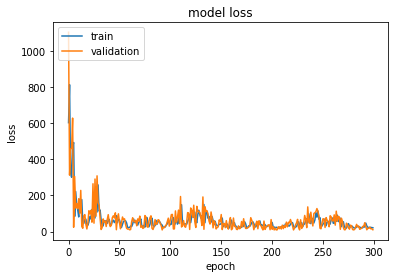

In [215]:
print(history1.history.keys())
# "Loss"
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
#plt.plot(history1.history['mse'])
#plt.plot(history1.history['val_mse'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [216]:
model1.save('crop_prediction_model_version2.h5')

In [220]:
n_model = keras.models.load_model('/content/drive/MyDrive/Tensorflow model for Agricultural use/crop_prediction_model_version2.h5')

In [221]:
df.head()

,Yield_kg_,Back Scatter,NDVI,Area
0,170,-8.85088,0.559350,5993.486648
1,100,-13.24120,0.313923,6234.321452
2,170,-7.58420,0.797050,6029.639943
3,40,-9.17053,0.785093,1757.187183
4,55,-9.13041,0.787306,2983.031785


In [229]:
new_data = inputdataset(-7.58420,	0.797050,	6029.639943)

In [230]:
n_model.predict(new_data)

array([[133.27806]], dtype=float32)

In [232]:
old_model = keras.models.load_model('/content/drive/MyDrive/Tensorflow model for Agricultural use/crop_prediction_model_version1.h5')

In [233]:
old_model.predict(new_data)

array([[112.79823]], dtype=float32)